### Monty Hall

#### Step 1: What to Simulate 
For each play we will simulate what's behind all three doors:

the one the contestant first picks
the one that Monty opens
the remaining door

#### Step 2: Simulating One Play

In [3]:
import pandas as pd
import numpy as np

goats = pd.Series(['first goat', 'second goat'])

In [4]:


goats = pd.Series(['first goat', 'second goat'])
goats

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [5]:
#Confirming that the Function works
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

In [6]:
hidden_behind_doors = pd.Series(['car', 'first goat', 'second goat'])
hidden_behind_doors

0            car
1     first goat
2    second goat
dtype: object

In [7]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [8]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [9]:
monty_hall_game()

['first goat', 'second goat', 'car']

In [10]:
monty_hall_game()

['second goat', 'first goat', 'car']

#### Step 3: Number of Repetitions

#### Step 4: Coding the Simulation

In [11]:
games = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])
games

,Guess,Revealed,Remaining


In [12]:
# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    to_add=pd.Series(monty_hall_game(),index=games.columns)
    games=games.append(to_add,ignore_index=True)


#### Visualization

In [13]:
original_choice = games.groupby(by='Guess').count()
original_choice.drop(columns="Revealed",inplace=True)
original_choice=original_choice.rename(columns={'Remaining':'Count'})
original_choice

,Count
Guess,
car,3329
first goat,3313
second goat,3358


In [15]:
remaining_door = games.groupby(by='Remaining').count()
remaining_door.drop(columns="Revealed",inplace=True)
remaining_door=remaining_door.rename(columns={'Remaining':'Count'})
remaining_door

,Guess
Remaining,
car,6671
first goat,1623
second goat,1706


In [19]:
joined=original_choice.join(remaining_door)
joined=joined.rename(columns={'Count':'Original Door','Guess':'Remaining Door'})
joined

,Original Door,Remaining Door
Guess,,
car,3329,6671
first goat,3313,1623
second goat,3358,1706


<AxesSubplot:ylabel='Guess'>

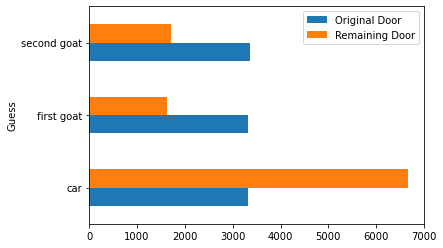

In [25]:
joined.plot.barh()

#### Finding Probabilities

In [28]:
rolls = np.arange(1, 51, 1)
results = pd.DataFrame({
    'Rolls': rolls,
    'Chance of at least one 6': 1 - (5/6)**rolls})
results.head()

,Rolls,Chance of at least one 6
0,1,0.166667
1,2,0.305556
2,3,0.421296
3,4,0.517747
4,5,0.598122


<AxesSubplot:xlabel='Rolls', ylabel='Chance of at least one 6'>

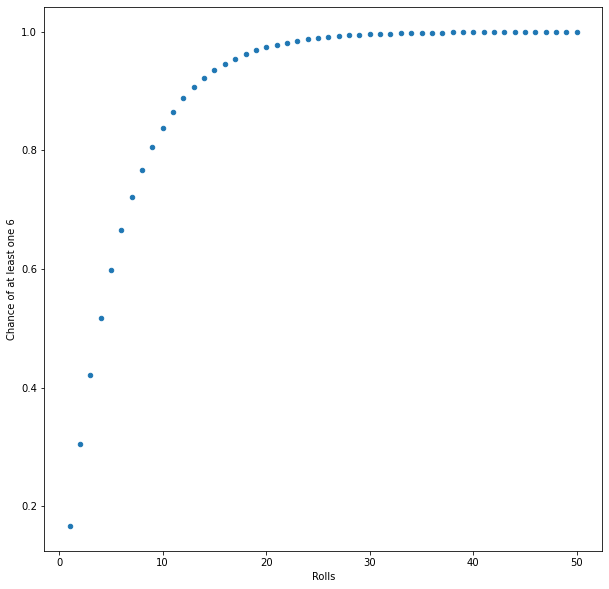

In [32]:
results.plot.scatter(x='Rolls',y='Chance of at least one 6',figsize=(10,10))

In [31]:
results[results['Rolls']==50]

,Rolls,Chance of at least one 6
49,50,0.99989


Chapter 9 completed